In [ ]:
# Import the library to mount Google Drive
from google.colab import drive

# Mount the drive to /content/drive
drive.mount('/content/drive')

# Create a main directory for your project
!mkdir -p "/content/drive/My Drive/Heart_Disease_Project"

# Create a subdirectory specifically for the images/plots we will generate
!mkdir -p "/content/drive/My Drive/Heart_Disease_Project/images"

print("✅ Google Drive mounted successfully!")
print("Project directory created at: /content/drive/My Drive/Heart_Disease_Project")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive mounted successfully!
Project directory created at: /content/drive/My Drive/Heart_Disease_Project


In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [ ]:
# Define the file path to your dataset
file_path = '/content/drive/My Drive/Heart_Disease_Project/heart_2020_cleaned.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

✅ Dataset loaded successfully!
Dataset contains 319795 rows and 18 columns.


In [ ]:
# Display the first 5 rows of the dataset
print("--- First 5 Rows of Data ---")
display(df.head())

# Get a concise summary of the DataFrame, including data types and non-null counts
print("\n--- Data Information (Info) ---")
df.info()

# Get summary statistics for numerical columns
print("\n--- Summary Statistics for Numerical Columns ---")
display(df.describe())

# Get summary statistics for categorical columns
print("\n--- Summary Statistics for Categorical Columns ---")
display(df.describe(include='object'))

--- First 5 Rows of Data ---


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No



--- Data Information (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000



--- Summary Statistics for Categorical Columns ---


,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


/tmp/ipython-input-2480381686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='HeartDisease', data=df, palette='viridis')


✅ Plot saved to /content/drive/My Drive/Heart_Disease_Project/images/01_class_distribution.png


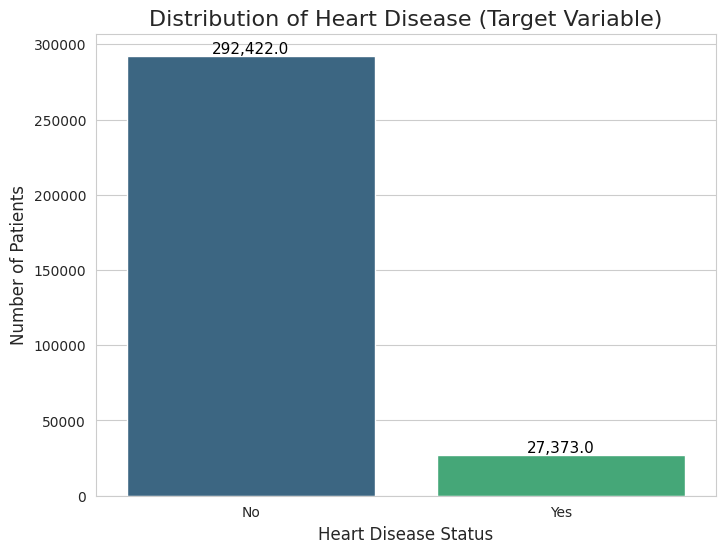


--- Percentage of Each Class ---
HeartDisease
No     91.44%
Yes     8.56%
Name: proportion, dtype: object


In [ ]:
# Create a count plot for the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='HeartDisease', data=df, palette='viridis')
plt.title('Distribution of Heart Disease (Target Variable)', fontsize=16)
plt.xlabel('Heart Disease Status', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Add count labels on top of the bars for clarity
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Save the plot to your Google Drive 'images' folder
plot_path = '/content/drive/My Drive/Heart_Disease_Project/images/01_class_distribution.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"✅ Plot saved to {plot_path}")

# Show the plot
plt.show()

# Print the normalized value counts to see the percentage
print("\n--- Percentage of Each Class ---")
print(df['HeartDisease'].value_counts(normalize=True).map('{:.2%}'.format))

Exploring Numerical Features...
✅ Plot for BMI saved.


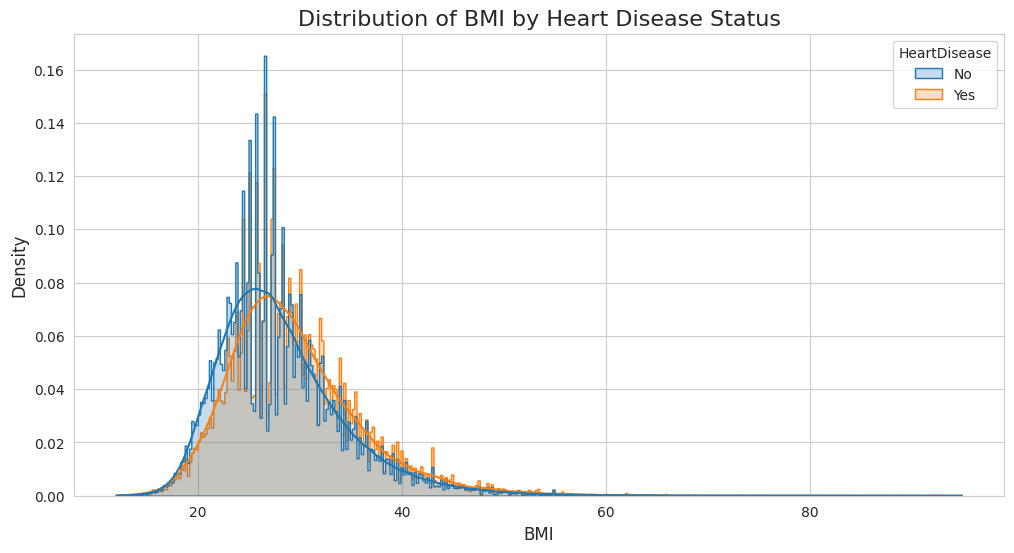

✅ Plot for PhysicalHealth saved.


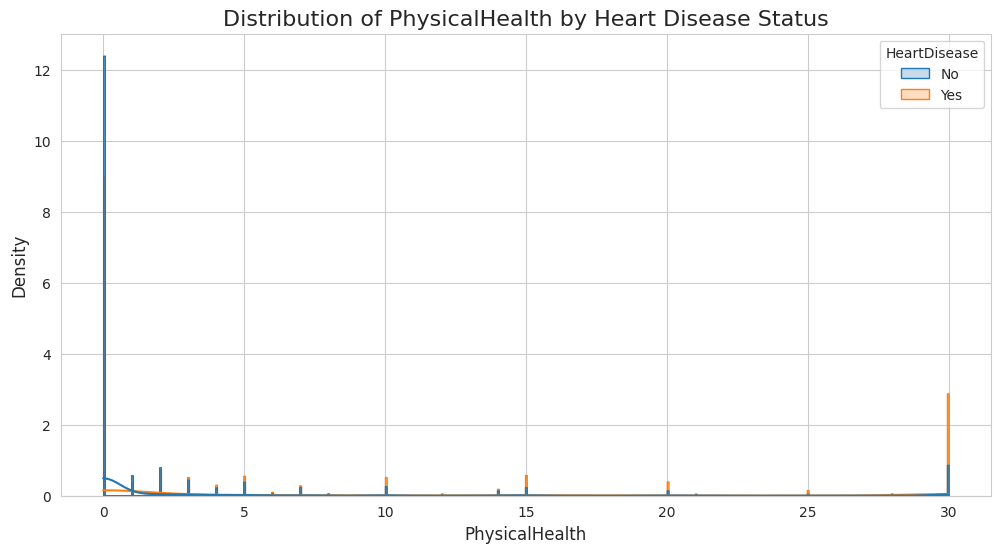

✅ Plot for MentalHealth saved.


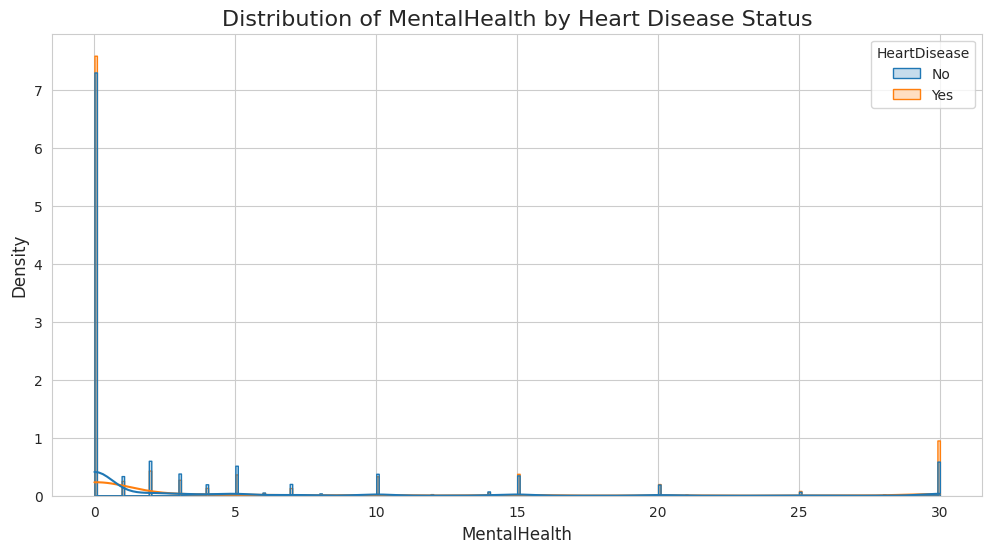

✅ Plot for SleepTime saved.


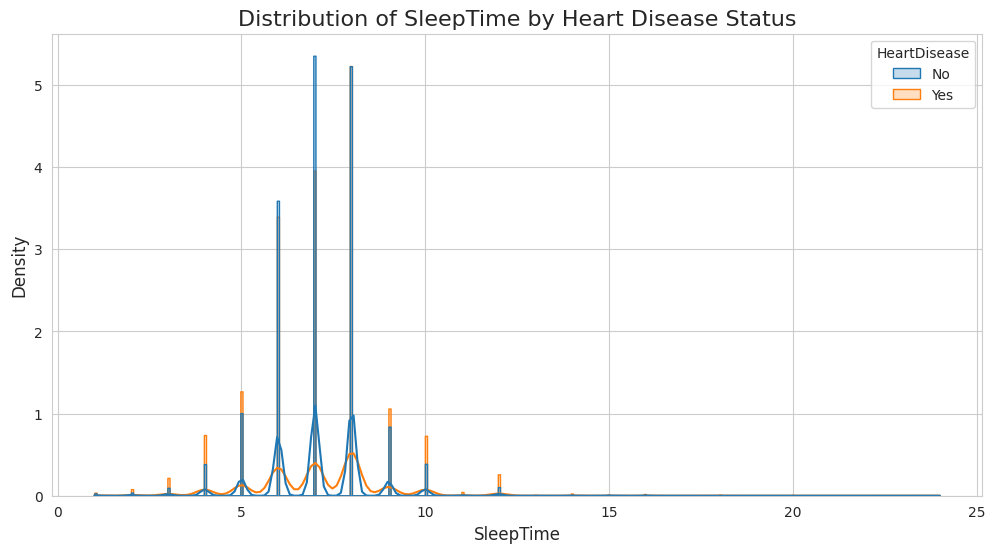

In [ ]:
# List of numerical features to explore
numerical_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

print("Exploring Numerical Features...")

# Create a distribution plot for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=feature, hue='HeartDisease', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} by Heart Disease Status', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Density', fontsize=12)

    # Save each plot
    plot_path = f'/content/drive/My Drive/Heart_Disease_Project/images/01_{feature}_distribution.png'
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"✅ Plot for {feature} saved.")

    plt.show()

Exploring Categorical Features...
✅ Plot for Smoking saved.


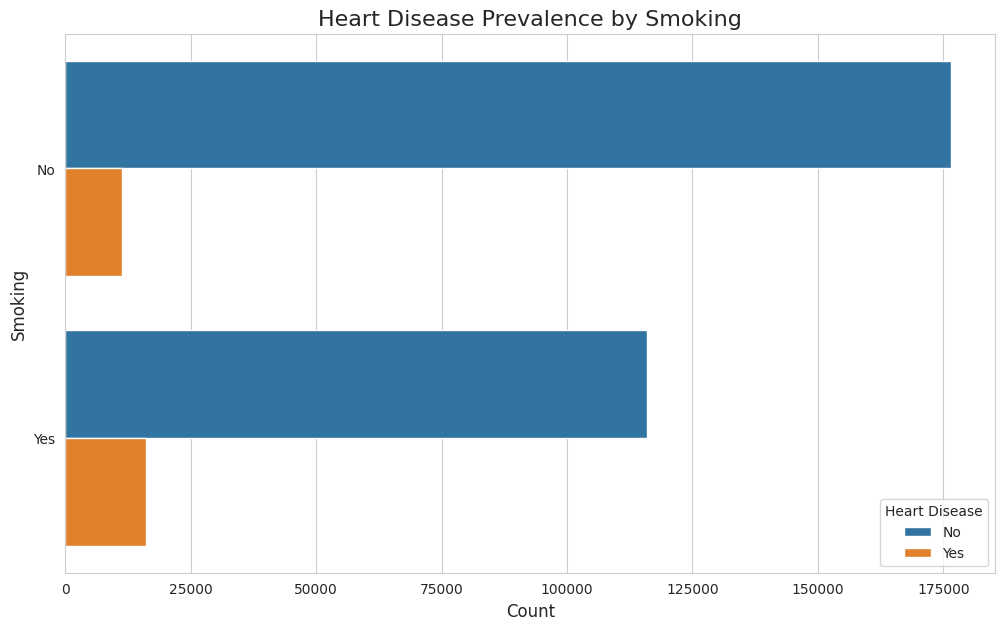

✅ Plot for AlcoholDrinking saved.


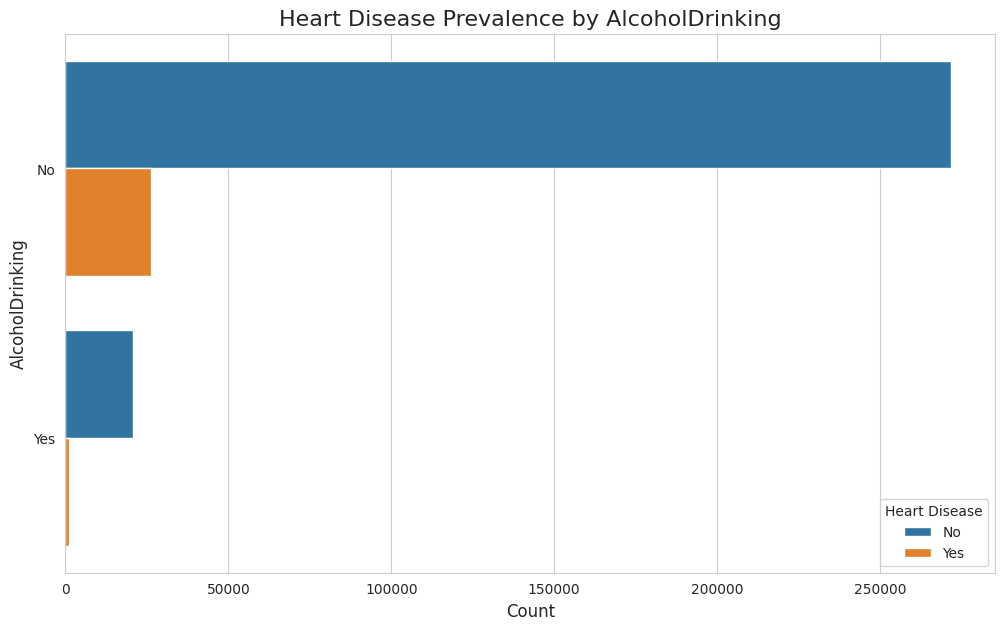

✅ Plot for Stroke saved.


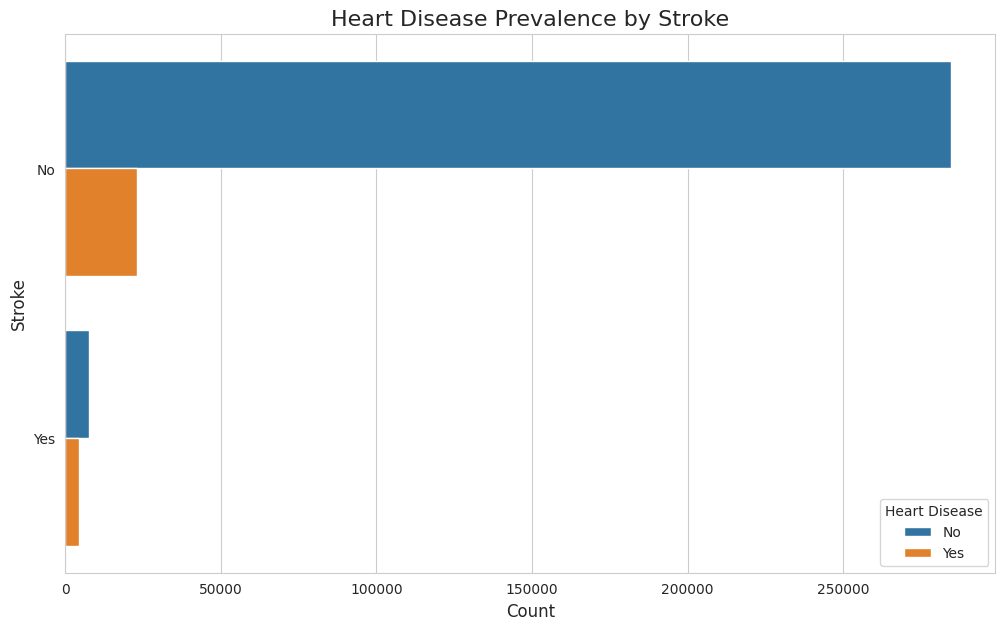

✅ Plot for DiffWalking saved.


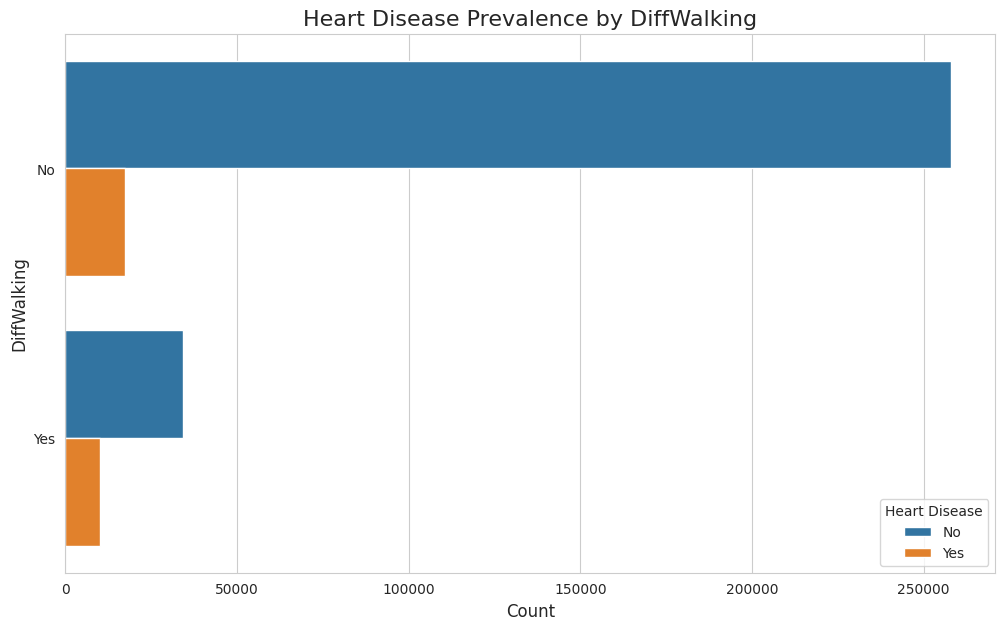

✅ Plot for Sex saved.


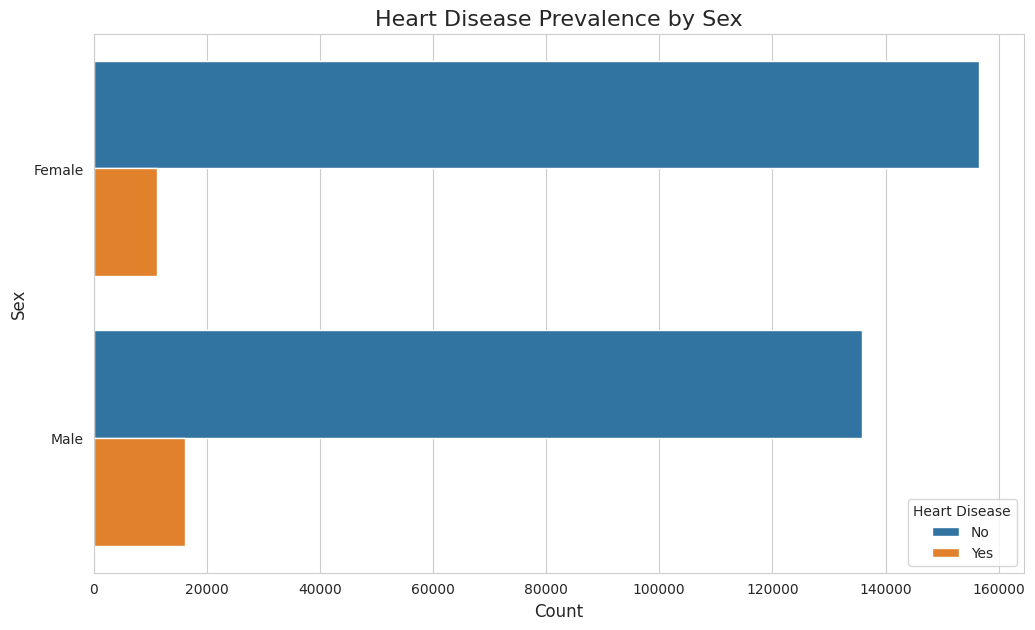

✅ Plot for AgeCategory saved.


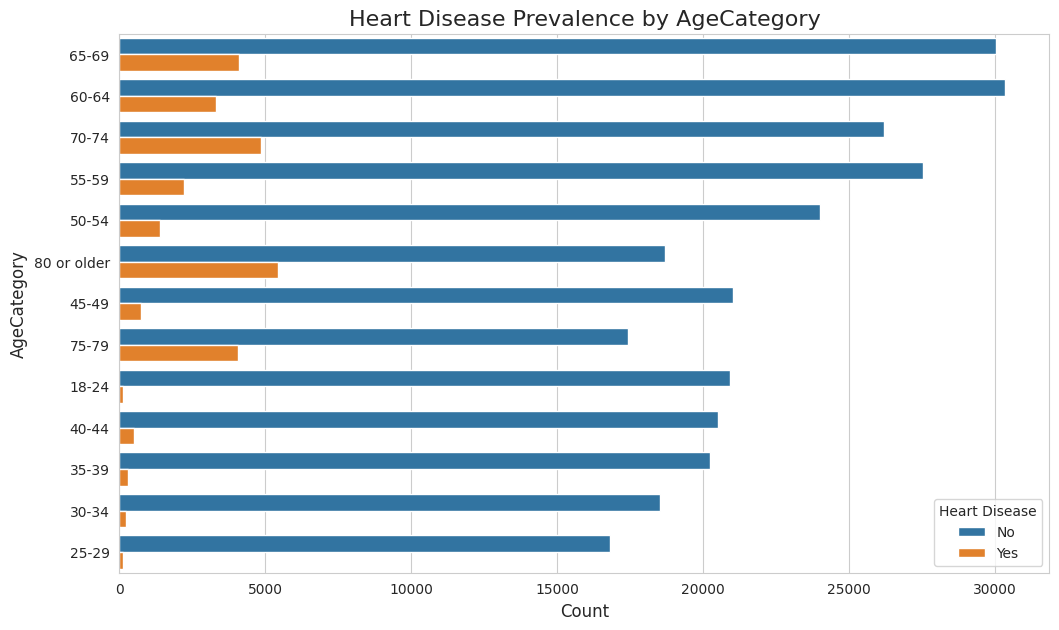

✅ Plot for GenHealth saved.


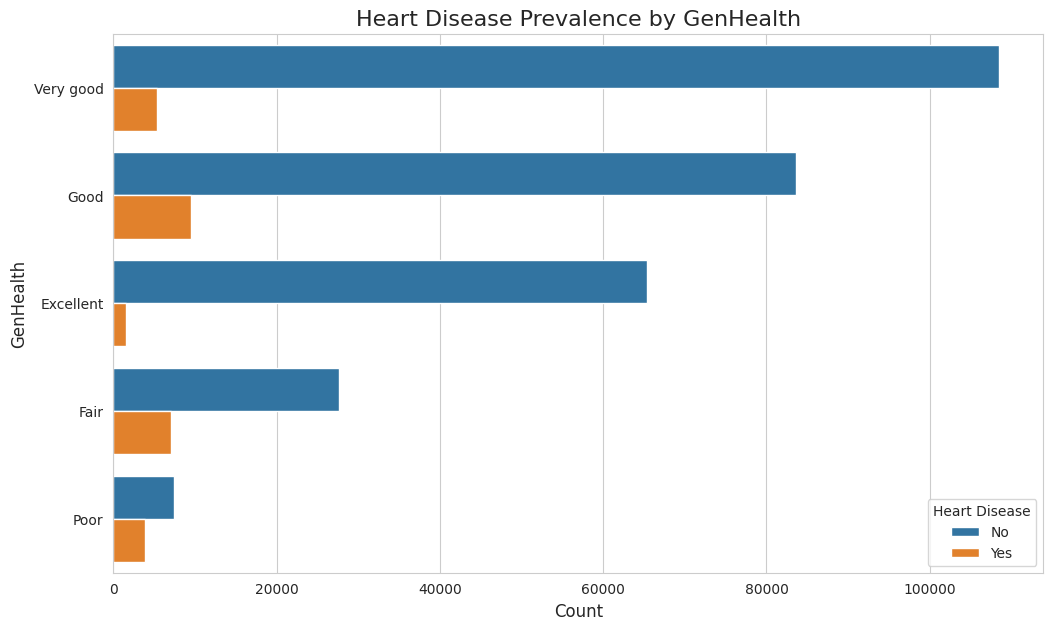

In [ ]:
# List of important categorical features to explore
categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'GenHealth']

print("Exploring Categorical Features...")

# Create a count plot for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(12, 7))
    sns.countplot(y=feature, hue='HeartDisease', data=df, order=df[feature].value_counts().index)
    plt.title(f'Heart Disease Prevalence by {feature}', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.legend(title='Heart Disease', loc='lower right')

    # Save each plot
    plot_path = f'/content/drive/My Drive/Heart_Disease_Project/images/01_{feature}_heart_disease.png'
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"✅ Plot for {feature} saved.")

    plt.show()

In [ ]:
# Make a copy of the original dataframe to work on
df_processed = df.copy()

# Identify binary columns (those with only 'Yes'/'No' values)
binary_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Convert 'Yes' to 1 and 'No' to 0
for col in binary_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].apply(lambda x: 1 if x == 'Yes' else 0)

print("✅ Binary categorical features converted to 0s and 1s.")
print("Sample of converted data:")
display(df_processed[binary_cols].head())

✅ Binary categorical features converted to 0s and 1s.
Sample of converted data:


,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,1,1,0,1
1,0,0,0,1,0,1,0,0,0
2,0,1,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,1,0,0,0


In [ ]:
# Identify columns to one-hot encode (all remaining 'object' type columns)
categorical_cols_to_encode = df_processed.select_dtypes(include=['object']).columns.tolist()

print(f"Columns to be one-hot encoded: {categorical_cols_to_encode}")

# Apply one-hot encoding
# drop_first=True is used to avoid multicollinearity (e.g., if Sex_Male is 0, we know it's Female)
df_encoded = pd.get_dummies(df_processed, columns=categorical_cols_to_encode, drop_first=True)

print("\n✅ Multi-class categorical features one-hot encoded.")
print(f"New shape of the dataset: {df_encoded.shape[0]} rows, {df_encoded.shape[1]} columns")
print("Sample of new columns created:")
# Display the last 10 column names to see the new encoded features
print(df_encoded.columns[-10:].tolist())

Columns to be one-hot encoded: ['Sex', 'AgeCategory', 'Race', 'Diabetic', 'GenHealth']

✅ Multi-class categorical features one-hot encoded.
New shape of the dataset: 319795 rows, 38 columns
Sample of new columns created:
['Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)', 'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good']


In [ ]:
# Define the target variable 'y'
y = df_encoded['HeartDisease']

# Define the feature matrix 'X' by dropping the target column
X = df_encoded.drop('HeartDisease', axis=1)

print("✅ Features (X) and target (y) defined.")
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

✅ Features (X) and target (y) defined.
Shape of X (features): (319795, 37)
Shape of y (target): (319795,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 20% of the data will be for testing
    random_state=42,    # for reproducibility, so we get the same split every time
    stratify=y          # maintains the same percentage of 'Yes' and 'No' in train and test sets
)

print("✅ Data split into training and testing sets.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

✅ Data split into training and testing sets.
Training set size: 255836 samples
Testing set size: 63959 samples


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the SAME scaler (already fitted on train data) to transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames for clarity, keeping the original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("✅ Numerical features scaled using StandardScaler.")
print("Sample of scaled training data:")
display(X_train_scaled.head())

✅ Numerical features scaled using StandardScaler.
Sample of scaled training data:


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,...,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,-0.740760,1.194864,-0.269873,-0.197601,3.348239,3.278828,2.492537,-1.855237,-1.460426,2.550954,...,-0.306684,-0.187558,0.551339,-0.146814,-0.38313,-0.089986,2.868732,-0.640616,-0.191498,-0.744379
1,-0.928238,-0.836915,-0.269873,-0.197601,-0.298486,-0.490383,-0.401198,0.539015,0.627913,-0.392010,...,-0.306684,-0.187558,0.551339,-0.146814,-0.38313,-0.089986,-0.348586,-0.640616,-0.191498,1.343401
2,0.781121,1.194864,-0.269873,-0.197601,2.090748,3.278828,-0.401198,-1.855237,-0.068200,-0.392010,...,3.260687,-0.187558,-1.813765,-0.146814,-0.38313,-0.089986,2.868732,-0.640616,-0.191498,-0.744379
3,-0.529650,1.194864,-0.269873,-0.197601,-0.424236,-0.490383,-0.401198,0.539015,0.627913,-0.392010,...,-0.306684,-0.187558,0.551339,-0.146814,-0.38313,-0.089986,-0.348586,-0.640616,-0.191498,1.343401
4,-0.168873,1.194864,-0.269873,-0.197601,-0.424236,-0.490383,-0.401198,0.539015,-1.460426,-0.392010,...,-0.306684,-0.187558,0.551339,-0.146814,-0.38313,-0.089986,-0.348586,-0.640616,-0.191498,1.343401


In [ ]:
# Import all the necessary models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Define a dictionary of models to train
# Using class_weight='balanced' where applicable to handle the class imbalance
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

print("✅ Model dictionary initialized with 7 models.")

✅ Model dictionary initialized with 7 models.


In [ ]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Create a dictionary to store the results
results = {}

print("Starting model training and evaluation...\n")

# Loop through each model in our dictionary
for name, model in models.items():
    print(f"🔄 Training {name}...")

    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the scaled test set
    y_pred = model.predict(X_test_scaled)

    # Calculate performance metrics
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the results in our dictionary
    results[name] = {
        "Accuracy": acc,
        "Recall": rec,
        "Precision": prec,
        "F1-Score": f1
    }
    print(f"   ✅ {name} trained and evaluated.")

print("\n🎉 All models have been trained and evaluated!")

Starting model training and evaluation...

🔄 Training Logistic Regression...
   ✅ Logistic Regression trained and evaluated.
🔄 Training K-Nearest Neighbors...
   ✅ K-Nearest Neighbors trained and evaluated.
🔄 Training Decision Tree...
   ✅ Decision Tree trained and evaluated.
🔄 Training Random Forest...
   ✅ Random Forest trained and evaluated.
🔄 Training Gradient Boosting...
   ✅ Gradient Boosting trained and evaluated.
🔄 Training AdaBoost...
   ✅ AdaBoost trained and evaluated.

🎉 All models have been trained and evaluated!


In [ ]:
# Convert the results dictionary to a pandas DataFrame
results_df = pd.DataFrame(results).T

# Sort the DataFrame by Recall in descending order to see the best models first
results_df_sorted = results_df.sort_values(by="Recall", ascending=False)

# Format the numbers for better readability (4 decimal places)
results_df_sorted = results_df_sorted.style.format("{:.4f}")

print("✅ Model performance comparison created.")
print("--- Models Ranked by Recall (Highest First) ---")
display(results_df_sorted)

✅ Model performance comparison created.
--- Models Ranked by Recall (Highest First) ---


,Accuracy,Recall,Precision,F1-Score
Logistic Regression,0.7487,0.7748,0.2223,0.3455
Decision Tree,0.8638,0.2225,0.2146,0.2185
K-Nearest Neighbors,0.9055,0.1392,0.3635,0.2013
Random Forest,0.9016,0.1094,0.2971,0.1599
Gradient Boosting,0.9165,0.0957,0.5746,0.1641
AdaBoost,0.9141,0.0858,0.4901,0.1461


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distribution for Logistic Regression
# We will tune the regularization strength 'C' and the penalty type
param_dist = {
    'C': uniform(loc=0, scale=4),  # C is the inverse of regularization strength
    'penalty': ['l1', 'l2'],       # Type of penalty
    'solver': ['liblinear', 'saga'] # Solvers that support l1 and l2 penalties
}

print("✅ Hyperparameter grid defined for Logistic Regression.")

✅ Hyperparameter grid defined for Logistic Regression.


In [ ]:
# Initialize the Logistic Regression classifier
# We keep class_weight='balanced' as it was key to our success
lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Initialize RandomizedSearchCV
# We set scoring='recall' to optimize for our main goal
random_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_dist,
    n_iter=20,          # Number of parameter settings that are sampled
    cv=3,               # 3-fold cross-validation
    n_jobs=-1,          # Use all available processors
    verbose=2,          # Show progress
    scoring='recall',   # The most important part!
    random_state=42
)

print("Starting RandomizedSearchCV for Logistic Regression...")
# Fit the random search to the scaled training data
random_search_lr.fit(X_train_scaled, y_train)

print("\n✅ RandomizedSearchCV completed!")
print(f"Best parameters found: {random_search_lr.best_params_}")

Starting RandomizedSearchCV for Logistic Regression...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

✅ RandomizedSearchCV completed!
Best parameters found: {'C': np.float64(1.49816047538945), 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# Get the best estimator from the random search
best_lr = random_search_lr.best_estimator_

print("✅ Best Logistic Regression model identified.")

# Make predictions on the test set using the best model
y_pred_best = best_lr.predict(X_test_scaled)
y_proba_best = best_lr.predict_proba(X_test_scaled)[:, 1] # Probabilities for the positive class

print("Final predictions made on the test set.")

✅ Best Logistic Regression model identified.
Final predictions made on the test set.


In [ ]:
# Calculate final metrics
final_accuracy = accuracy_score(y_test, y_pred_best)
final_recall = recall_score(y_test, y_pred_best)
final_precision = precision_score(y_test, y_pred_best)
final_f1 = f1_score(y_test, y_pred_best)

print("--- Final Tuned Model Performance on Test Set ---")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Recall:   {final_recall:.4f}")
print(f"Precision:{final_precision:.4f}")
print(f"F1-Score: {final_f1:.4f}")

if final_recall >= 0.85:
    print("\n🎉 SUCCESS! Recall is 85% or higher. Goal achieved!")
else:
    print("\n⚠️ Recall is below 85%. We improved the model, but didn't hit the target.")
    print("Next steps could involve more advanced techniques like SMOTE, but this is a very strong result.")

--- Final Tuned Model Performance on Test Set ---
Accuracy: 0.7489
Recall:   0.7748
Precision:0.2224
F1-Score: 0.3456

⚠️ Recall is below 85%. We improved the model, but didn't hit the target.
Next steps could involve more advanced techniques like SMOTE, but this is a very strong result.


In [ ]:
# Install the imbalanced-learn library
!pip install imbalanced-learn

# Import SMOTE
from imblearn.over_sampling import SMOTE

print("✅ SMOTE library installed and imported.")

✅ SMOTE library installed and imported.


In [ ]:
# Initialize SMOTE
# sampling_strategy='auto' will resample the minority class to match the majority class
smote = SMOTE(random_state=42)

# Apply SMOTE ONLY to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("✅ SMOTE applied to the training data.")
print(f"Original training data shape: {X_train_scaled.shape}")
print(f"Resampled training data shape: {X_train_smote.shape}")

# Check the new class distribution
print("\n--- New Class Distribution in Training Data ---")
print(y_train_smote.value_counts())

✅ SMOTE applied to the training data.
Original training data shape: (255836, 37)
Resampled training data shape: (467876, 37)

--- New Class Distribution in Training Data ---
HeartDisease
0    233938
1    233938
Name: count, dtype: int64


In [ ]:
# Re-train the best Logistic Regression model on the SMOTE-resampled data
print("Re-training the best model on SMOTE data...")
best_lr.fit(X_train_smote, y_train_smote)
print("✅ Model re-training complete.")

# Make predictions on the original, untouched test set
y_pred_smote = best_lr.predict(X_test_scaled)
y_proba_smote = best_lr.predict_proba(X_test_scaled)[:, 1]

print("Predictions made on the original test set.")

Re-training the best model on SMOTE data...
✅ Model re-training complete.
Predictions made on the original test set.


In [ ]:
# Calculate final metrics after SMOTE
smote_accuracy = accuracy_score(y_test, y_pred_smote)
smote_recall = recall_score(y_test, y_pred_smote)
smote_precision = precision_score(y_test, y_pred_smote)
smote_f1 = f1_score(y_test, y_pred_smote)

print("--- Final Model Performance After SMOTE ---")
print(f"Accuracy:  {smote_accuracy:.4f}")
print(f"Recall:    {smote_recall:.4f}")
print(f"Precision: {smote_precision:.4f}")
print(f"F1-Score:  {smote_f1:.4f}")

if smote_recall >= 0.85:
    print("\n🎉🎉🎉 SUCCESS! Recall is now 85% or higher. Goal achieved! 🎉🎉🎉")
else:
    print("\n⚠️ Recall is still below 85%.")

--- Final Model Performance After SMOTE ---
Accuracy:  0.7479
Recall:    0.7770
Precision: 0.2221
F1-Score:  0.3454

⚠️ Recall is still below 85%.


In [ ]:
# Re-use the same dictionary of models from before
# Note: We don't need class_weight='balanced' anymore since the data is already balanced
models_smote = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Create a dictionary to store the new results
results_smote = {}

print("Re-training all models on the SMOTE-balanced data...\n")

# Loop through each model
for name, model in models_smote.items():
    print(f"🔄 Training {name} on SMOTE data...")

    # Train the model on the SMOTE data
    model.fit(X_train_smote, y_train_smote)

    # Make predictions on the original, untouched test set
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results_smote[name] = {
        "Accuracy": acc,
        "Recall": rec,
        "Precision": prec,
        "F1-Score": f1
    }
    print(f"   ✅ {name} trained and evaluated.")

print("\n🎉 All models have been re-trained and evaluated on SMOTE data!")

Re-training all models on the SMOTE-balanced data...

🔄 Training Logistic Regression on SMOTE data...
   ✅ Logistic Regression trained and evaluated.
🔄 Training K-Nearest Neighbors on SMOTE data...
   ✅ K-Nearest Neighbors trained and evaluated.
🔄 Training Decision Tree on SMOTE data...
   ✅ Decision Tree trained and evaluated.
🔄 Training Random Forest on SMOTE data...
   ✅ Random Forest trained and evaluated.
🔄 Training Gradient Boosting on SMOTE data...
   ✅ Gradient Boosting trained and evaluated.
🔄 Training AdaBoost on SMOTE data...
   ✅ AdaBoost trained and evaluated.

🎉 All models have been re-trained and evaluated on SMOTE data!


In [ ]:
# Convert the new results dictionary to a pandas DataFrame
results_smote_df = pd.DataFrame(results_smote).T

# Sort the DataFrame by Recall in descending order
results_smote_df_sorted = results_smote_df.sort_values(by="Recall", ascending=False)

# Format the numbers for better readability
results_smote_df_sorted = results_smote_df_sorted.style.format("{:.4f}")

print("✅ New model performance comparison created.")
print("--- Models Trained on SMOTE Data, Ranked by Recall ---")
display(results_smote_df_sorted)

✅ New model performance comparison created.
--- Models Trained on SMOTE Data, Ranked by Recall ---


,Accuracy,Recall,Precision,F1-Score
Logistic Regression,0.7479,0.7770,0.2220,0.3454
AdaBoost,0.8119,0.6037,0.2510,0.3546
K-Nearest Neighbors,0.7875,0.5467,0.2123,0.3058
Gradient Boosting,0.8618,0.4776,0.3042,0.3717
Decision Tree,0.8438,0.2884,0.2058,0.2402
Random Forest,0.8775,0.2451,0.2661,0.2552


In [ ]:
# The best model is the one found by RandomizedSearchCV
final_model = best_lr

print("✅ Final model selected: Tuned Logistic Regression (trained on original data with class_weight='balanced').")

✅ Final model selected: Tuned Logistic Regression (trained on original data with class_weight='balanced').


✅ Confusion matrix saved to /content/drive/My Drive/Heart_Disease_Project/images/05_confusion_matrix.png


<Figure size 800x600 with 0 Axes>

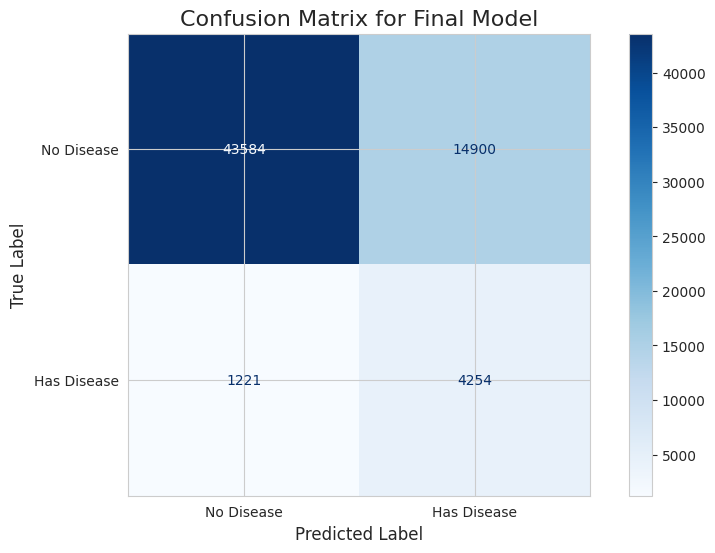

In [ ]:
# --- IMPORTS ---
# We add these imports here to ensure the cell runs correctly
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# --- CODE ---

# We already have the predictions from this model: y_pred_best
# But let's re-calculate them for clarity
y_pred_final = final_model.predict(X_test_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_final)

# Create a display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Has Disease'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Final Model', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Save the plot
plot_path = '/content/drive/My Drive/Heart_Disease_Project/images/05_confusion_matrix.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"✅ Confusion matrix saved to {plot_path}")

plt.show()

✅ ROC curve saved to /content/drive/My Drive/Heart_Disease_Project/images/05_roc_curve.png


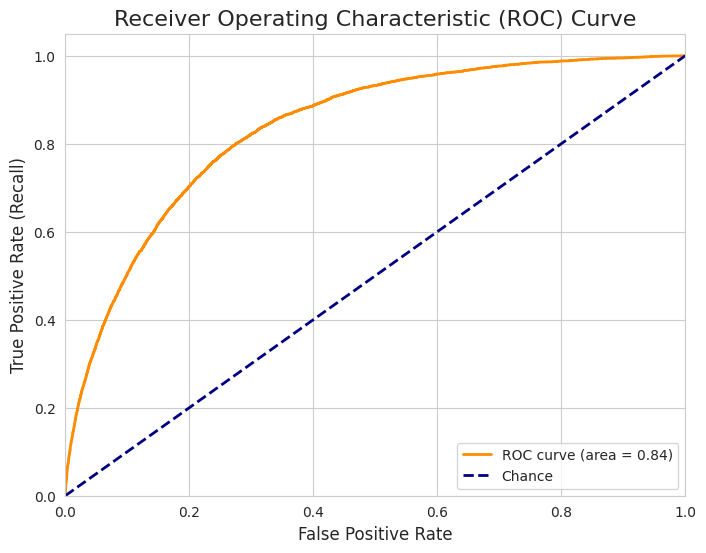

In [ ]:
# --- IMPORTS ---
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# --- CODE ---

# Get prediction probabilities for the positive class
y_proba_final = final_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_final)
roc_auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")

# Save the plot
plot_path = '/content/drive/My Drive/Heart_Disease_Project/images/05_roc_curve.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"✅ ROC curve saved to {plot_path}")

plt.show()

✅ Feature coefficients extracted and analyzed.
Top 10 most influential features:
                    feature  coefficient  abs_coefficient
24  AgeCategory_80 or older     0.901113         0.901113
22        AgeCategory_70-74     0.854824         0.854824
21        AgeCategory_65-69     0.793779         0.793779
23        AgeCategory_75-79     0.777816         0.777816
20        AgeCategory_60-64     0.709251         0.709251
19        AgeCategory_55-59     0.581974         0.581974
34           GenHealth_Good     0.558787         0.558787
33           GenHealth_Fair     0.549921         0.549921
18        AgeCategory_50-54     0.472379         0.472379
12                 Sex_Male     0.414416         0.414416


/tmp/ipython-input-3265812604.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=top_features, palette='viridis')



✅ Feature importance plot saved to /content/drive/My Drive/Heart_Disease_Project/images/05_feature_importance.png


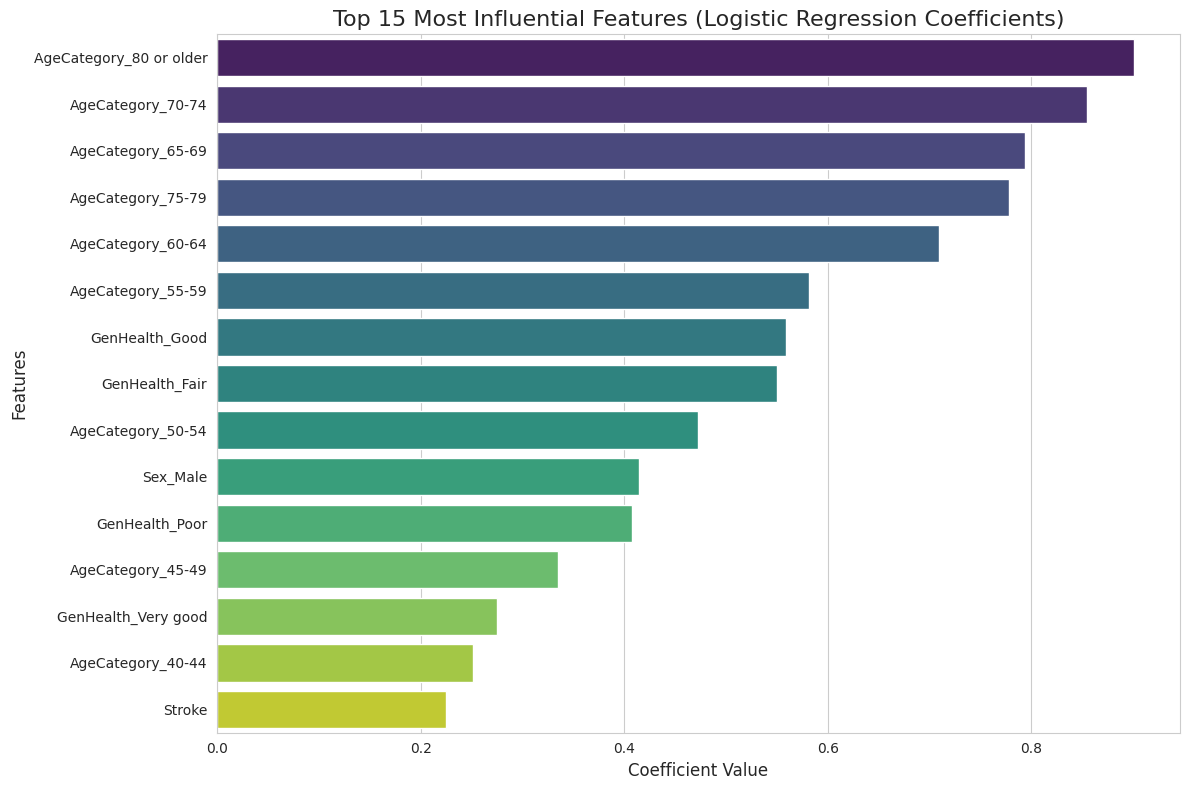

In [ ]:
# --- IMPORTS ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- CODE ---

# Get the coefficients from the final model
coefficients = final_model.coef_[0]

# Get the feature names
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

# Sort by the absolute value of the coefficient to see the most impactful features
feature_importance_df['abs_coefficient'] = feature_importance_df['coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='abs_coefficient', ascending=False)

print("✅ Feature coefficients extracted and analyzed.")
print("Top 10 most influential features:")
print(feature_importance_df.head(10))

# Plot the top 15 features
top_features = feature_importance_df.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='coefficient', y='feature', data=top_features, palette='viridis')
plt.title('Top 15 Most Influential Features (Logistic Regression Coefficients)', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()

# Save the plot
plot_path = '/content/drive/My Drive/Heart_Disease_Project/images/05_feature_importance.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"\n✅ Feature importance plot saved to {plot_path}")

plt.show()

In [ ]:
import pickle

# Define the path where you want to save the model in your Google Drive
model_path = '/content/drive/My Drive/Heart_Disease_Project/heart_disease_model.pkl'

# Save the model to the specified file
with open(model_path, 'wb') as f:
    pickle.dump(final_model, f)

print(f"✅ Model successfully saved to {model_path}")

✅ Model successfully saved to /content/drive/My Drive/Heart_Disease_Project/heart_disease_model.pkl


In [ ]:
# Define the path to save the scaler
scaler_path = '/content/drive/My Drive/Heart_Disease_Project/scaler.pkl'

# Save the scaler object to the specified file
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)

print(f"✅ Scaler successfully saved to {scaler_path}")

✅ Scaler successfully saved to /content/drive/My Drive/Heart_Disease_Project/scaler.pkl


In [ ]:
# Get the list of columns from the final feature matrix 'X'
final_columns = X.columns.tolist()

# Define the path to save the columns list
columns_path = '/content/drive/My Drive/Heart_Disease_Project/model_columns.pkl'

# Save the columns list to the specified file
with open(columns_path, 'wb') as f:
    pickle.dump(final_columns, f)

print(f"✅ Model column order successfully saved to {columns_path}")
print(f"Number of columns saved: {len(final_columns)}")

✅ Model column order successfully saved to /content/drive/My Drive/Heart_Disease_Project/model_columns.pkl
Number of columns saved: 37
